In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import xgboost as xgb

In [2]:
# generating imbalanced dataset
np.random.seed(42)

n_samples_1 = 25
n_samples_2 = 375
centers = [(0,0),(2,2)]
cluster_std = [1.5,1.5]

X,y = make_blobs(n_samples=[n_samples_1,n_samples_2],centers=centers,cluster_std=cluster_std,random_state=0)

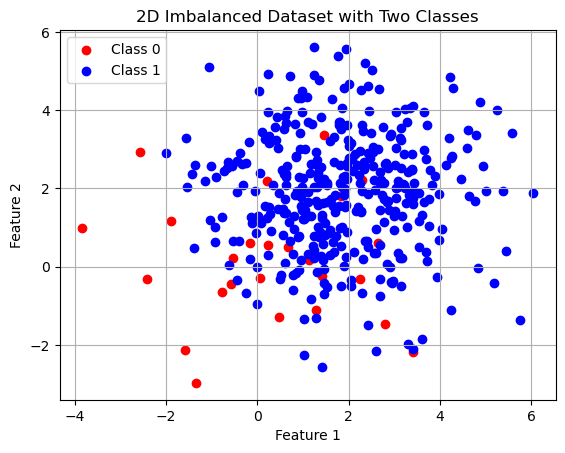

In [3]:
# plotting
plt.scatter(X[y==0][:,0],X[y==0][:,1],color='red',label='Class 0')
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='blue',label='Class 1')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.96      1.00      0.98       113

    accuracy                           0.96       120
   macro avg       0.98      0.64      0.71       120
weighted avg       0.96      0.96      0.95       120

ROC AUC Score: 0.9557522123893806


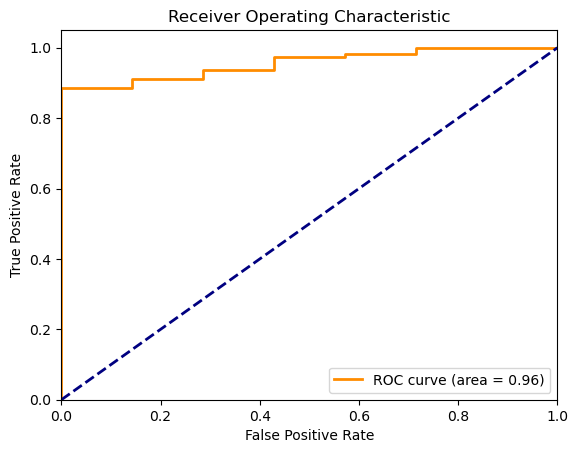

<Axes: >

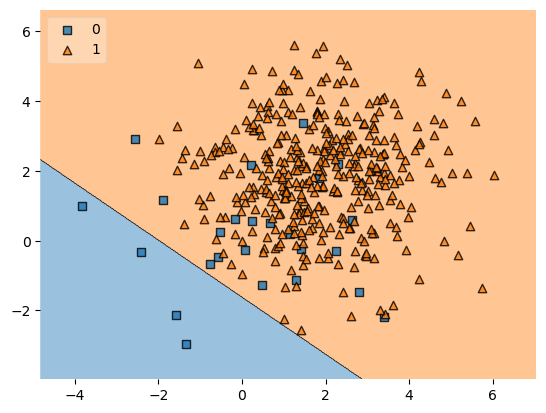

In [ ]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test,y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

plot_decision_regions(clf=clf,X=X,y=y,legend=2)

Random Undersampling

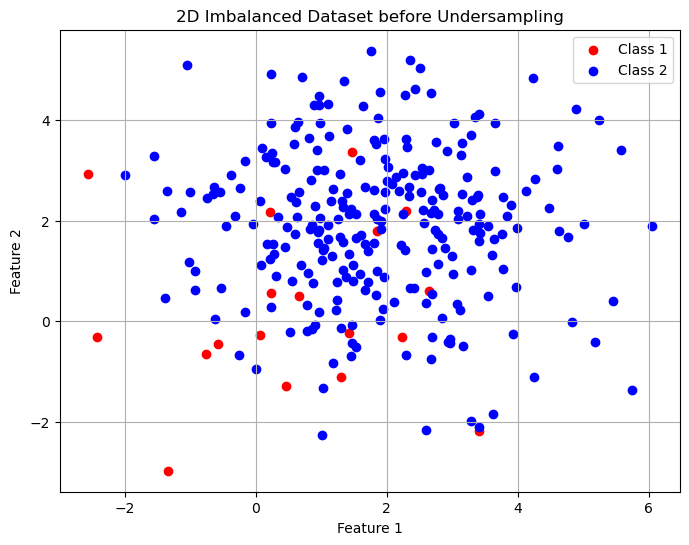

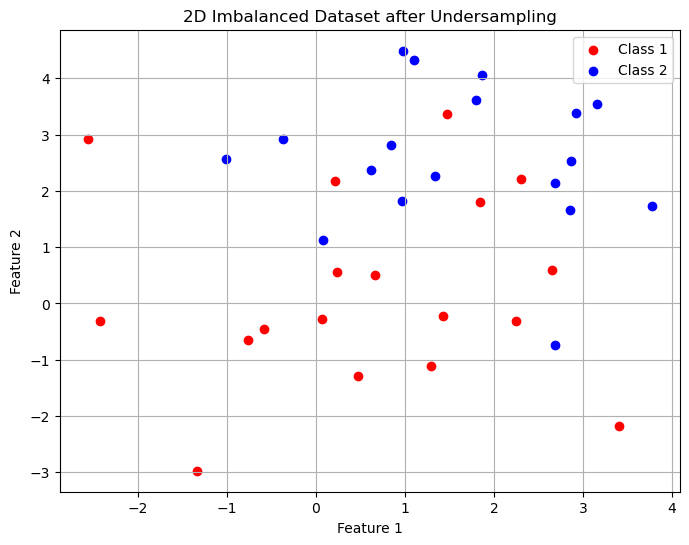

In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train,y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset before Undersampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset after Undersampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
X_train.shape

(280, 2)

In [36]:
X_resampled.shape
# 18 (class 0) + 18 (class 1)

(36, 2)

In [37]:
pd.Series(y_train).value_counts()

1    262
0     18
Name: count, dtype: int64

In [38]:
pd.Series(y_resampled).value_counts()

0    18
1    18
Name: count, dtype: int64

Classification Report (With Under Sampling):
              precision    recall  f1-score   support

           0       0.13      1.00      0.23         7
           1       1.00      0.59      0.74       113

    accuracy                           0.62       120
   macro avg       0.57      0.80      0.49       120
weighted avg       0.95      0.62      0.71       120

ROC AUC Score (With Under Sampling): 0.9469026548672567


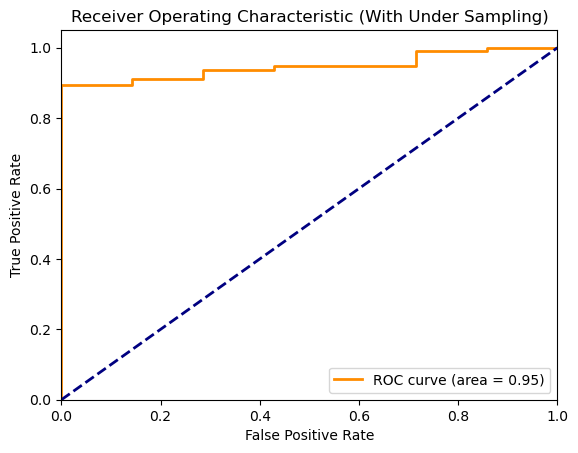

<Axes: >

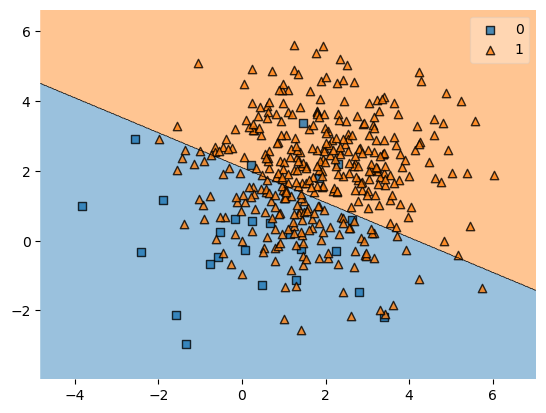

In [ ]:
clf_rus = LogisticRegression()
clf_rus.fit(X_resampled,y_resampled)

y_pred_rus = clf_rus.predict(X_test)
y_proba_rus = clf_rus.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (With Under Sampling):")
print(classification_report(y_test, y_pred_rus))

print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()

plot_decision_regions(clf = clf_rus,X=X,y=y)


Random Oversampling

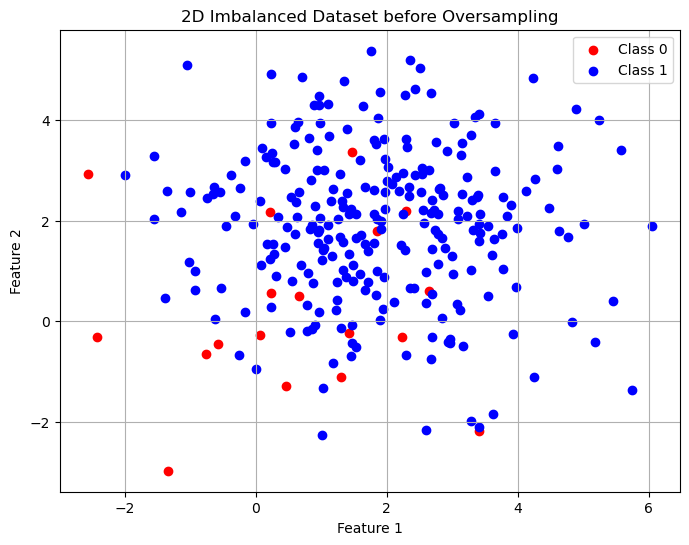

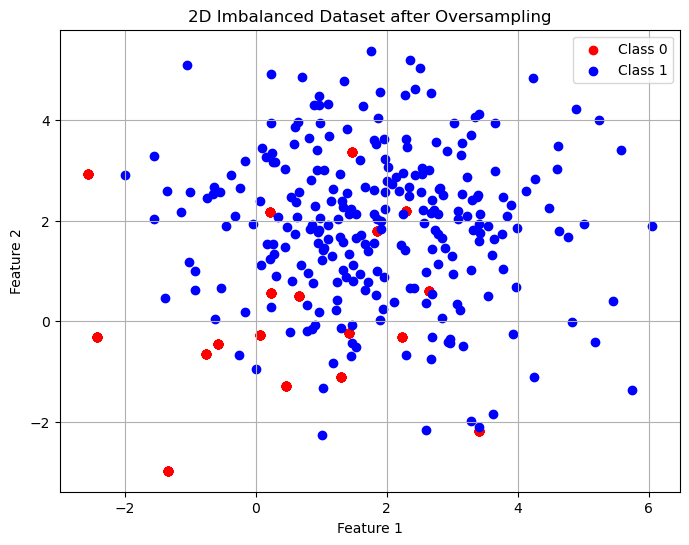

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled_os, y_resampled_os = ros.fit_resample(X_train, y_train)

# plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.title('2D Imbalanced Dataset before Oversampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_os[y_resampled_os == 0][:, 0], X_resampled_os[y_resampled_os== 0][:, 1], color='red', label='Class 0')
plt.scatter(X_resampled_os[y_resampled_os == 1][:, 0], X_resampled_os[y_resampled_os == 1][:, 1], color='blue', label='Class 1')
plt.title('2D Imbalanced Dataset after Oversampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# red points are same in no. as blue points. But since they are duplicates, they appear as one.

In [44]:
X_train.shape

(280, 2)

In [46]:
X_resampled_os.shape

(524, 2)

In [47]:
pd.Series(y_train).value_counts()

1    262
0     18
Name: count, dtype: int64

In [48]:
pd.Series(y_resampled_os).value_counts()

1    262
0    262
Name: count, dtype: int64

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         7
           1       1.00      0.73      0.84       113

    accuracy                           0.74       120
   macro avg       0.59      0.86      0.58       120
weighted avg       0.95      0.74      0.81       120

ROC AUC Score (With Over Sampling): 0.95448798988622


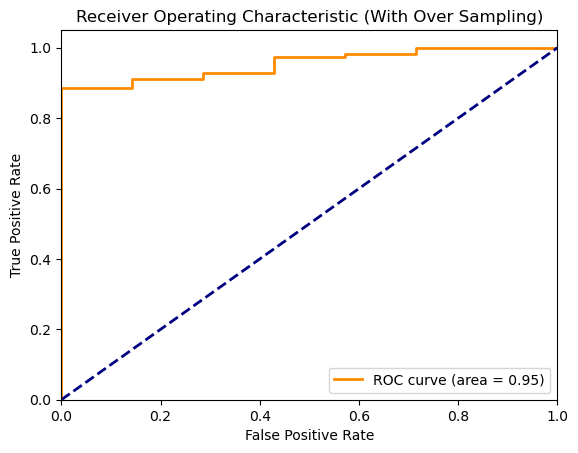

<Axes: >

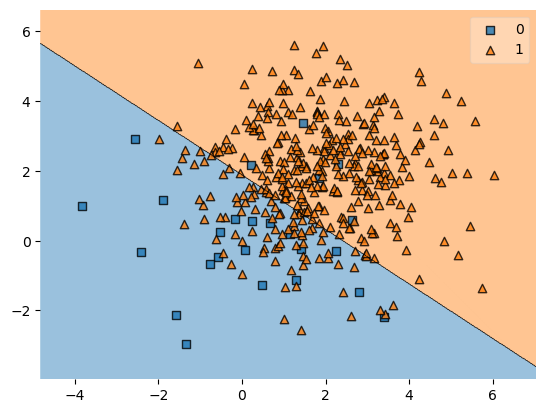

In [50]:
clf_ros = LogisticRegression()
clf_ros.fit(X_resampled_os,y_resampled_os)

y_pred_ros = clf_ros.predict(X_test)
y_proba_ros = clf_ros.predict_proba(X_test)[:, 1]

print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_ros))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_ros))

# Plotting ROC AUC Curve for resampled data
fpr_ros, tpr_ros, _ = roc_curve(y_test, y_proba_ros)
plt.figure()
plt.plot(fpr_ros, tpr_ros, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_ros))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")
plt.show()

plot_decision_regions(clf=clf_ros,X=X,y=y)

SMOTE

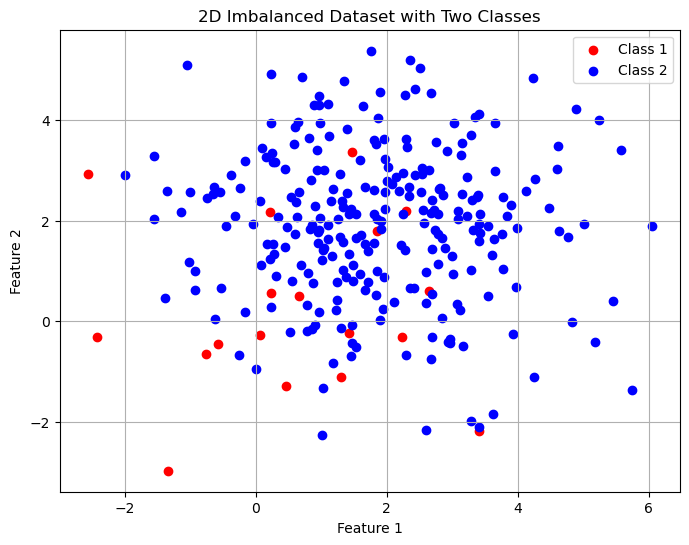

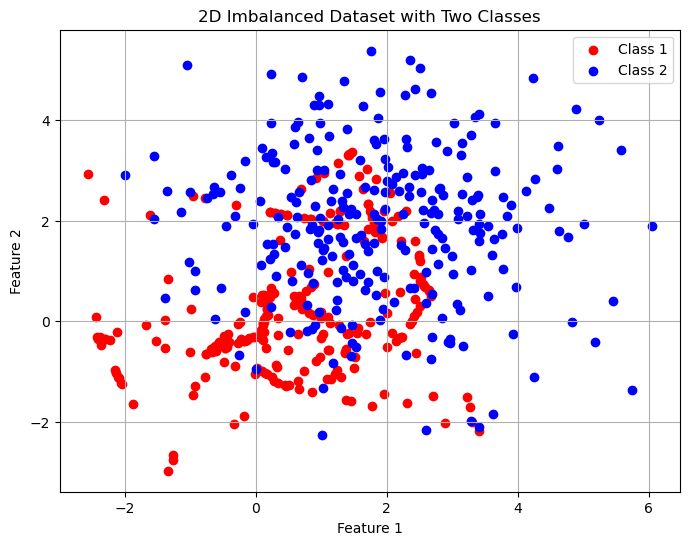

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
X_train.shape

(280, 2)

In [54]:
X_resampled_smote.shape

(524, 2)

In [55]:
pd.Series(y_train).value_counts()

1    262
0     18
Name: count, dtype: int64

In [56]:
pd.Series(y_resampled_smote).value_counts()

1    262
0    262
Name: count, dtype: int64

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.17      1.00      0.29         7
           1       1.00      0.69      0.82       113

    accuracy                           0.71       120
   macro avg       0.58      0.85      0.55       120
weighted avg       0.95      0.71      0.79       120

ROC AUC Score (With SMOTE): 0.95448798988622


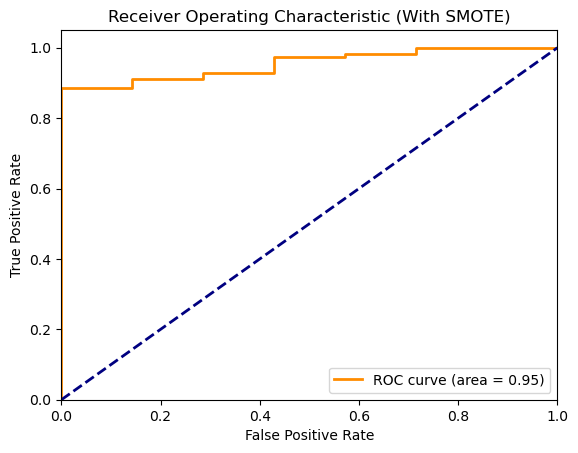

<Axes: >

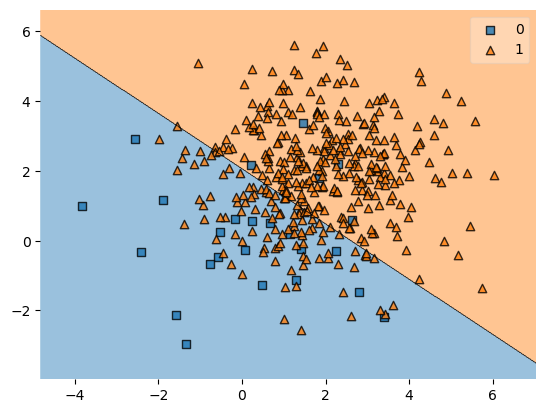

In [58]:
clf_smote = LogisticRegression()
clf_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict test set
y_pred_smote = clf_smote.predict(X_test)
y_proba_smote = clf_smote.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_smote))

# Plotting ROC AUC Curve for SMOTE data
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
plt.figure()
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

plot_decision_regions(clf = clf_smote,X=X,y=y)

c:\Users\KIIT\anaconda-3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\KIIT\anaconda-3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\KIIT\anaconda-3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.17      1.00      0.29         7
           1       1.00      0.69      0.82       113

    accuracy                           0.71       120
   macro avg       0.58      0.85      0.55       120
weighted avg       0.95      0.71      0.79       120

ROC AUC Score (With SMOTE): 0.8666245259165613


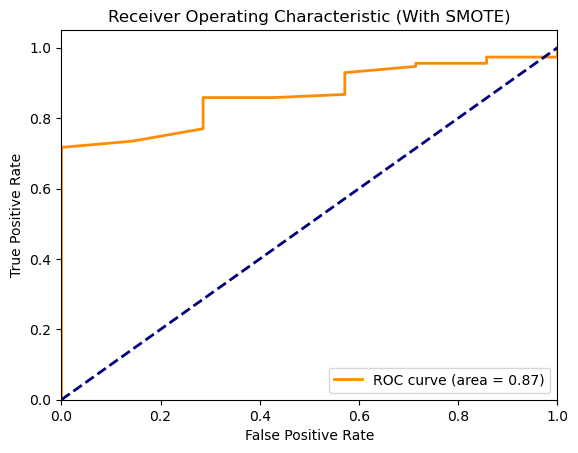

<Axes: >

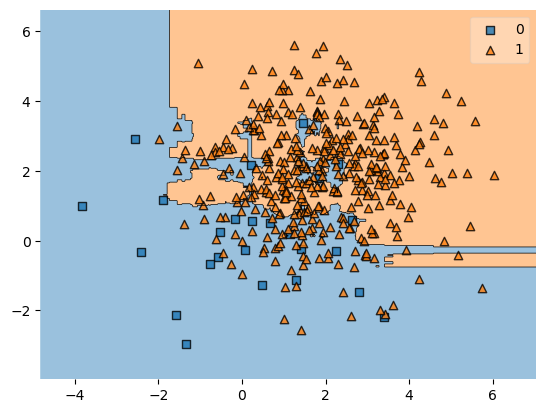

In [61]:
from imblearn.ensemble import BalancedRandomForestClassifier

classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_brf))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_brf))

# Plotting ROC AUC Curve for SMOTE data
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_proba_brf)
plt.figure()
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_brf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

plot_decision_regions(clf=classifier,X=X,y=y)

Cost Sensitive Learning

1. Class Weights

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.98      0.93      0.95       113

    accuracy                           0.92       120
   macro avg       0.68      0.82      0.73       120
weighted avg       0.95      0.92      0.93       120

ROC AUC Score: 0.8666245259165613


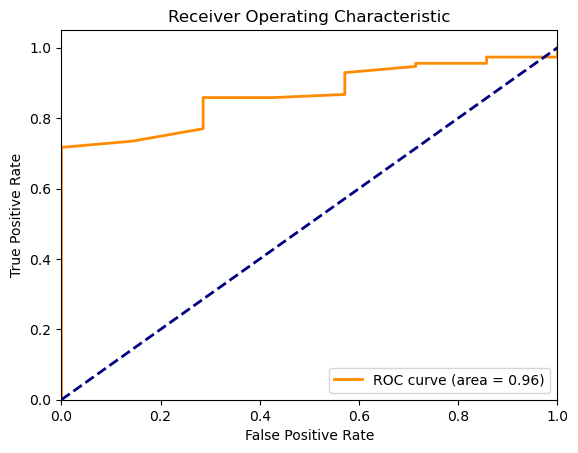

<Axes: >

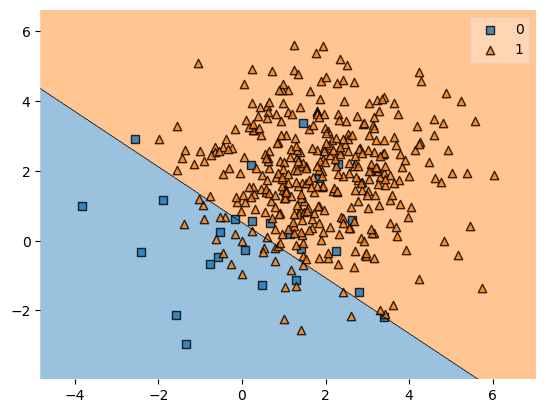

In [63]:
# Create a logistic regression model with class weights
model = LogisticRegression(class_weight={0:5,1:1}, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_cw = model.predict(X_test)
y_proba_cw = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_cw))


# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_cw))

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_cw)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

plot_decision_regions(clf=model,X=X,y=y)


2. Custom Loss Function

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.57      0.27         7
           1       0.97      0.83      0.90       113

    accuracy                           0.82       120
   macro avg       0.57      0.70      0.58       120
weighted avg       0.92      0.82      0.86       120

ROC AUC Score: 0.7319848293299621


c:\Users\KIIT\anaconda-3\Lib\site-packages\xgboost\core.py:729: UserWarning: [23:22:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  return func(**kwargs)


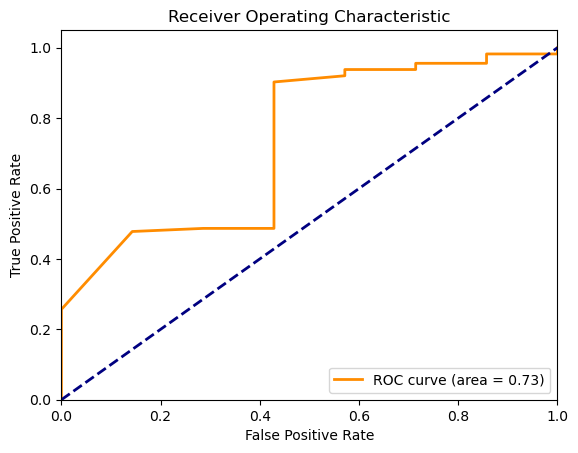

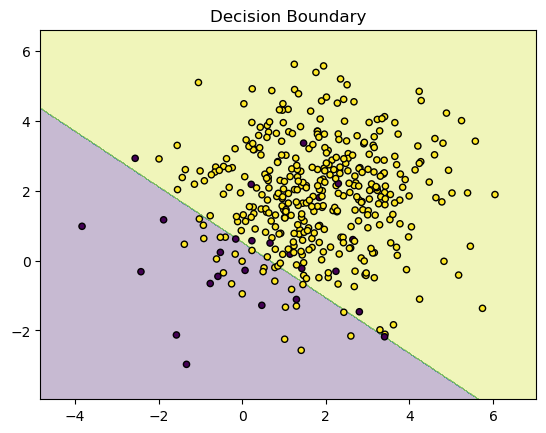

In [70]:
def custom_loss(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))  # Convert to probability

    # Define penalties
    false_positive_penalty = 10
    false_negative_penalty = 1.0

    grad = (preds - labels) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    hess = preds * (1 - preds) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    return grad, hess

# Convert to DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'silent': 1,
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=10, obj=custom_loss)

# Predict test set
y_pred = np.where(bst.predict(dtest) > 0.5, 1, 0)
y_proba = bst.predict(dtest)  # Probability predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC Score
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, model)